In [25]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 1. Load the Dataset

In [26]:
# Load the Titanic dataset
df = pd.read_csv('titanicDataset.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (1309, 14)


## 2. Data Exploration

In [27]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [29]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [30]:
# Summary of all columns including categorical
print("Detailed Summary (including categorical):")
df.describe(include='all')

Detailed Summary (including categorical):


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


## 3. Data Visualization

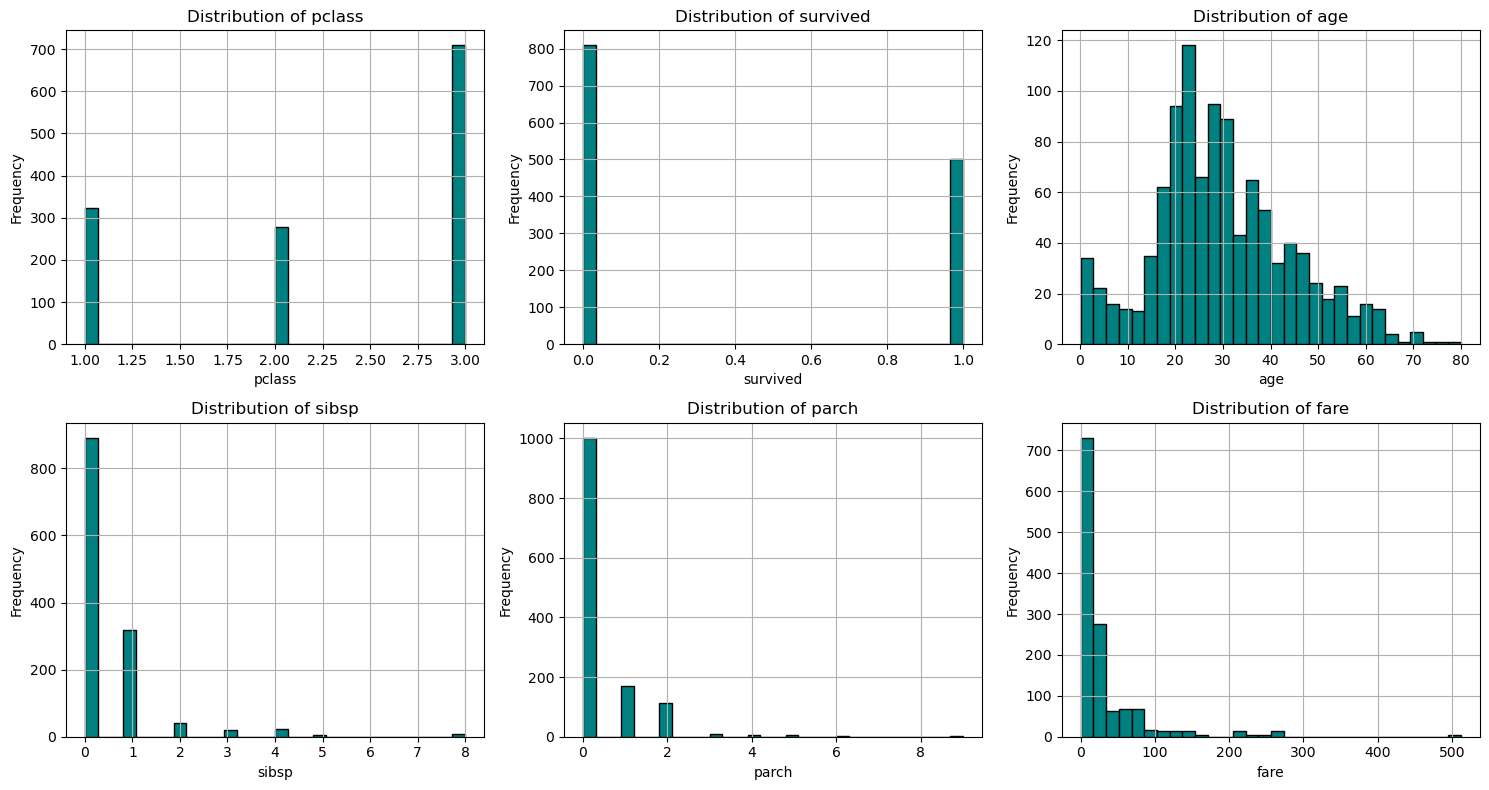

In [31]:
# Numerical features distribution
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:6]):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx], color='teal', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Null Value Analysis

In [32]:
# Check for null values
print("Null Values Count:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])
print(f"\nTotal null values: {df.isnull().sum().sum()}")

Null Values Count:
age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Total null values: 3855


In [33]:
# Null value percentage
print("Null Value Percentage:")
null_percentage = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({
    'Column': null_percentage.index,
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': null_percentage.values
})
null_df = null_df[null_df['Null_Count'] > 0].sort_values('Null_Percentage', ascending=False)
print(null_df)

Null Value Percentage:
       Column  Null_Count  Null_Percentage
12       body        1188        90.756303
9       cabin        1014        77.463713
11       boat         823        62.872422
13  home.dest         564        43.086325
4         age         263        20.091673
10   embarked           2         0.152788
8        fare           1         0.076394


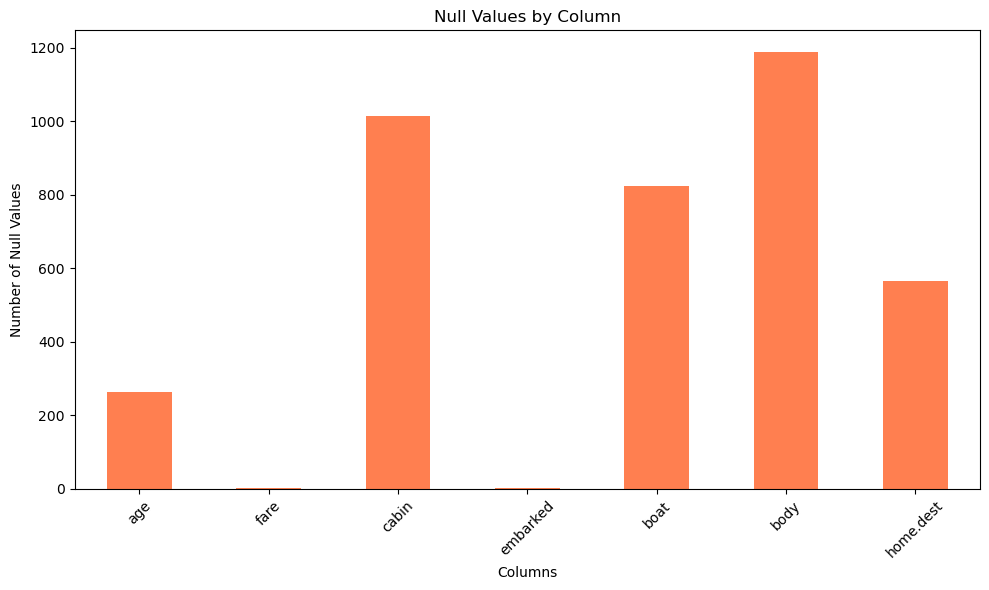

In [34]:
# Visualize null values
plt.figure(figsize=(10, 6))
null_data = df.isnull().sum()[df.isnull().sum() > 0]
if len(null_data) > 0:
    null_data.plot(kind='bar', color='coral')
    plt.title('Null Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Null Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No null values found in the dataset!")

## 5. Intelligent Imputation Strategy

We'll use a smart approach:
- **Mean/Median/Mode**: For 3 columns where simple statistics work well
- **Linear Regression**: For 1 column with predictable relationships
- **KNN**: For 1 remaining column with complex patterns

In [35]:
# Identify columns with null values
df_clean = df.copy()
cols_with_nulls = df_clean.columns[df_clean.isnull().any()].tolist()
numerical_cols_with_nulls = df_clean.select_dtypes(include=[np.number]).columns[df_clean.select_dtypes(include=[np.number]).isnull().any()].tolist()
categorical_cols_with_nulls = [col for col in cols_with_nulls if col not in numerical_cols_with_nulls]

print("=" * 60)
print("COLUMNS WITH NULL VALUES")
print("=" * 60)
print(f"\nNumerical columns: {numerical_cols_with_nulls}")
print(f"Categorical columns: {categorical_cols_with_nulls}")
print(f"\nTotal columns to impute: {len(cols_with_nulls)}")
print("\nNull value counts:")
for col in cols_with_nulls:
    null_count = df_clean[col].isnull().sum()
    null_pct = (null_count / len(df_clean)) * 100
    print(f"  {col}: {null_count} ({null_pct:.1f}%)")

COLUMNS WITH NULL VALUES

Numerical columns: ['age', 'fare', 'body']
Categorical columns: ['cabin', 'embarked', 'boat', 'home.dest']

Total columns to impute: 7

Null value counts:
  age: 263 (20.1%)
  fare: 1 (0.1%)
  cabin: 1014 (77.5%)
  embarked: 2 (0.2%)
  boat: 823 (62.9%)
  body: 1188 (90.8%)
  home.dest: 564 (43.1%)


### 5.1 Strategy Assignment

Assign the best imputation method for each column

In [36]:
# Strategy: Assign imputation methods intelligently
imputation_strategy = {}

# Assign strategies based on column count
if len(cols_with_nulls) >= 5:
    # We have 5+ columns with nulls
    # Use mean for first numerical column
    if len(numerical_cols_with_nulls) >= 1:
        imputation_strategy[numerical_cols_with_nulls[0]] = 'mean'
    
    # Use median for second numerical column
    if len(numerical_cols_with_nulls) >= 2:
        imputation_strategy[numerical_cols_with_nulls[1]] = 'median'
    
    # Use mode for third column (could be numerical or categorical)
    remaining_cols = [c for c in cols_with_nulls if c not in imputation_strategy]
    if len(remaining_cols) >= 1:
        imputation_strategy[remaining_cols[0]] = 'mode'
    
    # Use Linear Regression for fourth column (numerical)
    remaining_numerical = [c for c in numerical_cols_with_nulls if c not in imputation_strategy]
    if len(remaining_numerical) >= 1:
        imputation_strategy[remaining_numerical[0]] = 'linear_regression'
    
    # Use KNN for fifth column
    remaining_cols = [c for c in cols_with_nulls if c not in imputation_strategy]
    if len(remaining_cols) >= 1:
        imputation_strategy[remaining_cols[0]] = 'knn'
    
    # Any remaining columns get mode (safest default)
    remaining_cols = [c for c in cols_with_nulls if c not in imputation_strategy]
    for col in remaining_cols:
        imputation_strategy[col] = 'mode'
else:
    # Less than 5 columns - distribute available methods
    idx = 0
    methods = ['mean', 'median', 'mode', 'linear_regression', 'knn']
    
    for col in cols_with_nulls:
        if idx < len(methods):
            # Only use linear_regression and knn for numerical columns
            if methods[idx] in ['linear_regression', 'knn'] and col not in numerical_cols_with_nulls:
                imputation_strategy[col] = 'mode'
            else:
                imputation_strategy[col] = methods[idx]
        else:
            imputation_strategy[col] = 'mode'
        idx += 1

print("\n" + "=" * 60)
print("IMPUTATION STRATEGY")
print("=" * 60)
for col, method in imputation_strategy.items():
    print(f"  {col}: {method.upper()}")


IMPUTATION STRATEGY
  age: MEAN
  fare: MEDIAN
  cabin: MODE
  body: LINEAR_REGRESSION
  embarked: KNN
  boat: MODE
  home.dest: MODE


### 5.2 Apply Imputation Methods

In [37]:
print("\n" + "=" * 60)
print("APPLYING IMPUTATION")
print("=" * 60)

# 1. Apply Mean Imputation
mean_cols = [col for col, method in imputation_strategy.items() if method == 'mean']
for col in mean_cols:
    mean_value = df_clean[col].mean()
    df_clean[col].fillna(mean_value, inplace=True)
    print(f"\n✓ MEAN: {col}")
    print(f"  Filled with: {mean_value:.2f}")
    print(f"  Remaining nulls: {df_clean[col].isnull().sum()}")

# 2. Apply Median Imputation
median_cols = [col for col, method in imputation_strategy.items() if method == 'median']
for col in median_cols:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)
    print(f"\n✓ MEDIAN: {col}")
    print(f"  Filled with: {median_value:.2f}")
    print(f"  Remaining nulls: {df_clean[col].isnull().sum()}")

# 3. Apply Mode Imputation
mode_cols = [col for col, method in imputation_strategy.items() if method == 'mode']
for col in mode_cols:
    mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else df_clean[col].dropna().iloc[0]
    df_clean[col].fillna(mode_value, inplace=True)
    print(f"\n✓ MODE: {col}")
    print(f"  Filled with: {mode_value}")
    print(f"  Remaining nulls: {df_clean[col].isnull().sum()}")


APPLYING IMPUTATION

✓ MEAN: age
  Filled with: 29.88
  Remaining nulls: 0

✓ MEDIAN: fare
  Filled with: 14.45
  Remaining nulls: 0

✓ MODE: cabin
  Filled with: C23 C25 C27
  Remaining nulls: 0

✓ MODE: boat
  Filled with: 13
  Remaining nulls: 0

✓ MODE: home.dest
  Filled with: New York, NY
  Remaining nulls: 0


### 5.3 Linear Regression Imputation

In [38]:
# 4. Apply Linear Regression Imputation
lr_cols = [col for col, method in imputation_strategy.items() if method == 'linear_regression']

for target_col in lr_cols:
    print(f"\n✓ LINEAR REGRESSION: {target_col}")
    
    # Find suitable feature columns (numerical, no nulls)
    potential_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    potential_features = [c for c in potential_features if c != target_col and df_clean[c].notnull().all()]
    
    if len(potential_features) >= 1:
        # Use available features
        feature_cols = potential_features[:min(4, len(potential_features))]
        
        # Separate data
        df_not_null = df_clean[df_clean[target_col].notnull()]
        df_null = df_clean[df_clean[target_col].isnull()]
        
        if len(df_null) > 0 and len(df_not_null) > 0:
            # Train model
            X_train = df_not_null[feature_cols]
            y_train = df_not_null[target_col]
            
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # Predict
            X_predict = df_null[feature_cols]
            predictions = model.predict(X_predict)
            df_clean.loc[df_null.index, target_col] = predictions
            
            print(f"  Features used: {', '.join(feature_cols)}")
            print(f"  Imputed: {len(predictions)} values")
            print(f"  Remaining nulls: {df_clean[target_col].isnull().sum()}")
        else:
            print(f"  No nulls to impute")
    else:
        print(f"  Not enough features - using mean instead")
        mean_value = df_clean[target_col].mean()
        df_clean[target_col].fillna(mean_value, inplace=True)
        print(f"  Filled with mean: {mean_value:.2f}")


✓ LINEAR REGRESSION: body
  Features used: pclass, survived, age, sibsp
  Imputed: 1188 values
  Remaining nulls: 0


### 5.4 KNN Imputation

In [39]:
# 5. Apply KNN Imputation
knn_cols = [col for col, method in imputation_strategy.items() if method == 'knn']

for target_col in knn_cols:
    print(f"\n✓ KNN: {target_col}")
    
    if target_col in df_clean.select_dtypes(include=[np.number]).columns:
        # Get all numerical columns
        num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
        
        # Apply KNN imputation
        knn_imputer = KNNImputer(n_neighbors=5)
        df_clean[num_cols] = knn_imputer.fit_transform(df_clean[num_cols])
        
        print(f"  Applied KNN to all numerical columns")
        print(f"  Remaining nulls in {target_col}: {df_clean[target_col].isnull().sum()}")
    else:
        # For categorical, use mode
        print(f"  Column is categorical - using mode instead")
        mode_value = df_clean[target_col].mode()[0] if not df_clean[target_col].mode().empty else df_clean[target_col].dropna().iloc[0]
        df_clean[target_col].fillna(mode_value, inplace=True)
        print(f"  Filled with mode: {mode_value}")


✓ KNN: embarked
  Column is categorical - using mode instead
  Filled with mode: S


## 6. Final Cleaned Dataset

In [40]:
# Verify all nulls are handled
print("\n" + "=" * 60)
print("FINAL RESULTS")
print("=" * 60)

print(f"\n✓ Original dataset shape: {df.shape}")
print(f"✓ Original null values: {df.isnull().sum().sum()}")
print(f"\n✓ Final dataset shape: {df_clean.shape}")
print(f"✓ Final null values: {df_clean.isnull().sum().sum()}")

if df_clean.isnull().sum().sum() > 0:
    print("\n⚠ Warning: Some null values remain:")
    remaining_nulls = df_clean.isnull().sum()[df_clean.isnull().sum() > 0]
    for col, count in remaining_nulls.items():
        print(f"  {col}: {count}")
else:
    print("\n✓ SUCCESS: All null values have been imputed!")

print("\n" + "=" * 60)
print("IMPUTATION SUMMARY")
print("=" * 60)
for col, method in imputation_strategy.items():
    print(f"  {col}: {method.upper()}")


FINAL RESULTS

✓ Original dataset shape: (1309, 14)
✓ Original null values: 3855

✓ Final dataset shape: (1309, 14)
✓ Final null values: 0

✓ SUCCESS: All null values have been imputed!

IMPUTATION SUMMARY
  age: MEAN
  fare: MEDIAN
  cabin: MODE
  body: LINEAR_REGRESSION
  embarked: KNN
  boat: MODE
  home.dest: MODE


In [41]:
# Display the cleaned dataset
print("\n" + "=" * 60)
print("CLEANED DATASET PREVIEW")
print("=" * 60)
print("\nFirst 10 rows:")
display(df_clean.head(10))

print("\nDataset Info:")
df_clean.info()

print("\nStatistical Summary:")
display(df_clean.describe())


CLEANED DATASET PREVIEW

First 10 rows:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,164.043306,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,146.560778,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,13,146.841817,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,13,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,13,152.826906,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,168.987510,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,162.715315,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,13,166.645518,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,149.937588,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,C23 C25 C27,C,13,22.000000,"Montevideo, Uruguay"



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   float64
 13  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB

Statistical Summary:


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.281086,157.437563
std,0.837836,0.486055,12.883193,1.041658,0.865560,51.741500,31.747821
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,153.087127
50%,3.000000,0.000000,29.881138,0.000000,0.000000,14.454200,160.603159
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,162.914220
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 7. Save the Cleaned Dataset

In [42]:
# Save the final cleaned dataset
output_filename = 'titanic_cleaned.csv'
df_clean.to_csv(output_filename, index=False)

print("=" * 60)
print("DATASET SAVED")
print("=" * 60)
print(f"\n✓ File saved as: {output_filename}")
print(f"✓ Shape: {df_clean.shape}")
print(f"✓ Total null values: {df_clean.isnull().sum().sum()}")
print("\nYou can now use 'df_clean' for further analysis!")
print("\n" + "=" * 60)

DATASET SAVED

✓ File saved as: titanic_cleaned.csv
✓ Shape: (1309, 14)
✓ Total null values: 0

You can now use 'df_clean' for further analysis!

